In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
import random
from keras.utils import Sequence
from tensorflow import keras
import matplotlib.pyplot as plt
import sys
from PIL import Image
sys.modules['Image'] = Image
print(Image.__file__)
from sklearn.preprocessing import LabelEncoder
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


#!pip install -q git+https://github.com/tensorflow/docs
import cv2
import os
import zipfile

Using TensorFlow backend.


/home/clint_malinda/anaconda3/envs/tensorflow/lib/python3.7/site-packages/PIL/Image.py


## Fetching Dataset

In [29]:
data= "/home/clint_malinda/Documents/projects/Citrus/Leaves/"
classes=["Black spot","canker","greening","healthy"]

  

In [30]:
spot_dir = os.path.join('/home/clint_malinda/Documents/projects/Citrus/Leaves/Black spot')
canker_dir = os.path.join('/home/clint_malinda/Documents/projects/Citrus/Leaves/canker')
greening_dir = os.path.join('/home/clint_malinda/Documents/projects/Citrus/Leaves/greening')
health_dir = os.path.join('/home/clint_malinda/Documents/projects/Citrus/Leaves/healthy')


spot_files = os.listdir(spot_dir)
#print(spot_files[:10])

canker_files = os.listdir(canker_dir)
#print(canker_files[:10])

greening_files = os.listdir(greening_dir)
#print(greening_files[:10])

healthy_files = os.listdir(health_dir)

#print(healthy_files[:10])

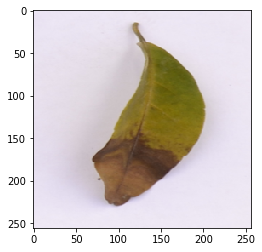

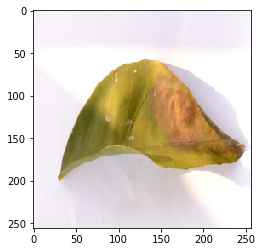

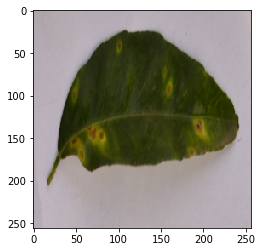

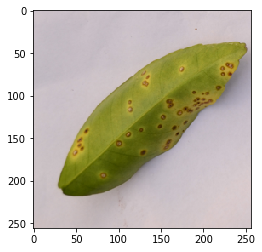

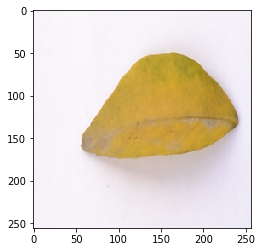

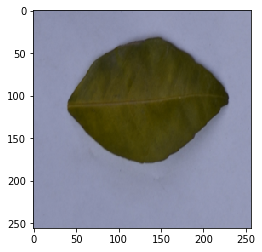

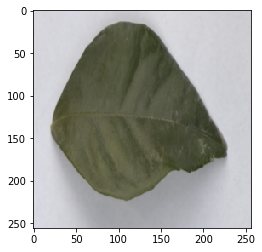

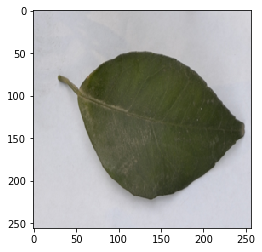

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_spot = [os.path.join(spot_dir, fname) 
                for fname in spot_files[pic_index-2:pic_index]]

next_canker = [os.path.join(canker_dir, fname) 
                for fname in canker_files[pic_index-2:pic_index]]

next_greening = [os.path.join(greening_dir, fname) 
                for fname in greening_files[pic_index-2:pic_index]]

next_healthy = [os.path.join(health_dir, fname) 
                for fname in healthy_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_spot+next_canker+next_greening+next_healthy):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  #plt.axis('Off')
  plt.show()

In [32]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

## Data Augmentation

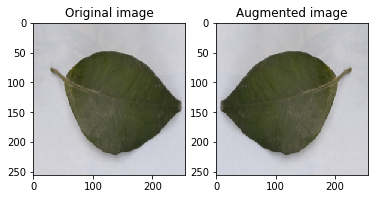

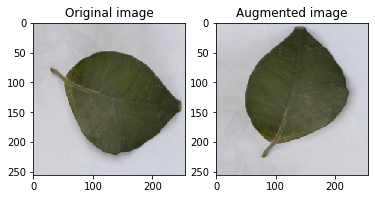

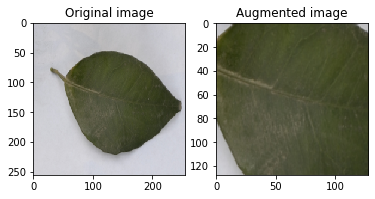

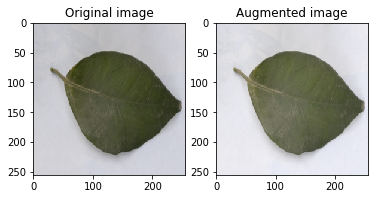

In [33]:
#flip
flipped = tf.image.flip_left_right(img)
visualize(img, flipped)

#rotate
rotated = tf.image.rot90(img)
visualize(img, rotated)

#crop
cropped = tf.image.central_crop(img, central_fraction=0.5)
visualize(img,cropped)

bright = tf.image.adjust_brightness(img, 0.1)
visualize(img, bright)

In [44]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
    data,
    target_size=(80,80),
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data,
    target_size=(80,80),
    class_mode='categorical',
    subset = 'validation'
)

Found 490 images belonging to 5 classes.
Found 119 images belonging to 5 classes.


In [50]:
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Convolution1D, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,AveragePooling2D
from tensorflow.keras import regularizers

model = Sequential([    
    Conv2D(32, (3,3), padding='same',activation='relu',input_shape=(80, 80, 3), kernel_regularizer=regularizers.l2(0.01)),
    
    Conv2D(32, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    Conv2D(64, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Dropout(0.2),

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Dropout(0.2),

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Dropout(0.2),
    
    Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2),



    Flatten(),
    
    Dropout(0.2),
    Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(5,activation='softmax')

])
    
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 80, 80, 32)        896       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 80, 80, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 80, 80, 32)        128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 40, 40, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 40, 40, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 40, 40, 64)       

In [51]:
history = model.fit(train_generator, epochs=18, validation_data = validation_generator , verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 4 steps
Epoch 1/18
 1/16 [>.............................] - ETA: 1:23

KeyboardInterrupt: 

In [14]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="Artificial Neural network - Model Visualization")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 4 steps
Epoch 1/20
 1/16 [>.............................] - ETA: 1:01

InvalidArgumentError:  input and filter must have the same depth: 3 vs 1
	 [[node sequential_1/conv2d_2/Relu (defined at <ipython-input-14-1bdf361b44b9>:1) ]] [Op:__inference_distributed_function_1531]

Function call stack:
distributed_function


In [ ]:
model.save("Citrus.h5")